In [189]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os


import datetime as dt

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
sns.set(style="ticks")
%matplotlib inline

from scipy.stats import norm
from scipy import stats

import sklearn
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [190]:
telecom=pd.read_csv("D://Yash-DS//Machine learning 2//telecom_churn_data.csv")
telecom .head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,214.82,213.80,21.10,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,0.00,0.00,nan,nan,0.16,nan,nan,nan,4.13,nan,nan,nan,1.15,nan,nan,nan,5.44,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,5.44,0.00,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,na

In [191]:
telecom.shape

(99999, 226)

In [192]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [193]:
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,99999.00,99999.00,98981.00,98981.00,98981.00,99999.00,99999.00,99999.00,99999.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,99999.00,99999.00,99999.00,99999.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.

In [194]:
telecom.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [195]:
# all numeric (float and int) variables in the dataset
telecom_numeric = telecom.select_dtypes(include=['float64', 'int64'])
telecom_numeric.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.00,0.00,0.00,197.38,214.82,213.80,21.10,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,0.00,0.00,nan,nan,0.16,nan,nan,nan,4.13,nan,nan,nan,1.15,nan,nan,nan,5.44,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,5.44,0.00,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.00,1.00,1.00,nan,252.00,252.00,252.00,nan,0.00,0.00,0.00,nan,1.00,1.00,1.00,nan,252.00,252.00,252.00,nan,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,212.17,212.17,212.17,nan,212.17,212.17,212.17,nan,0.00,0.00,0.00,nan,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,

Churn definition
Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time. In our analysis we are concentrating on high value customers, as approximately 80% of revenue comes from the top 20% customers. Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

Our dataset is divided into 3 phases:
Good phase wherein the customer is happy with the service
Action pase wherein the customer wasn't happy with service or got a better offer from competitor etc. In this phase, the customer usually shows different behaviour than the good phase. Also, it is crucial to identify high-churn-risk customers in this phase, so that some corrective actions can be taken at this point to prevet churn
Churn phase wherein the customer would have churned

High-value customers are those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).
After identifying high value customers, we will tag churn customers based on those who have not made any calls (either incoming or outgoing) and have not used mobile internet even once in the churn phase.

Let's first identify high-value customers

In [196]:
# filter high value customer
#total recharge amount is to be used for high value customer
tot_rech_cols=[col for col in telecom.columns if "total_rech_" in col]
tot_rech_cols

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9']

In [197]:
# total recharge amount
telecom['total_rech_data_amt_6']=telecom['total_rech_data_6']*telecom['av_rech_amt_data_6']
telecom['total_rech_data_amt_7']=telecom['total_rech_data_7']*telecom['av_rech_amt_data_7']
telecom['total_rech_data_amt_8']=telecom['total_rech_data_8']*telecom['av_rech_amt_data_8']
telecom['total_rech_data_amt_9']=telecom['total_rech_data_9']*telecom['av_rech_amt_data_9']


In [198]:
#drop total_rech_data and av_rech_amt_data
drop_col=['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
          'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9']
telecom.drop(drop_col,axis=1,inplace=True)


In [199]:
#average of recharge amount in 6 and 7 month
#telecom['avg_rech_amt_6and7']=telecom[(telecom['total_rech_amt_6'].fillna(0)+telecom['total_rech_data_amt_6'].fillna(0)+
                 # telecom['total_rech_amt_7'].fillna(0)+telecom['total_rech_data_amt_7'].fillna(0))/2.0]
telecom['amt_data_6'] = telecom[['total_rech_data_amt_6','total_rech_data_amt_6']].sum(axis=1)
telecom['amt_data_7'] = telecom[['total_rech_data_amt_7','total_rech_data_amt_7']].sum(axis=1)
    
telecom['avg_rech_amt_6and7'] = telecom[['amt_data_6','amt_data_7']].mean(axis=1)
telecom.head()


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_data_amt_9,amt_data_6,amt_data_7,avg_rech_amt_6and7
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,214.82,213.80,21.10,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,0.00,0.00,nan,nan,0.16,nan,nan,nan,4.13,nan,nan,nan,1.15,nan,nan,nan,5.44,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,5.44,0.00,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,4,3,2,6,362,252,2

In [200]:
telecom[['total_rech_amt_6','total_rech_amt_7','avg_rech_amt_6and7']].quantile(np.linspace(.1, 1, 9, 0))

,total_rech_amt_6,total_rech_amt_7,avg_rech_amt_6and7
0.10,0.00,0.00,0.00
0.20,80.00,65.00,0.00
0.30,120.00,110.00,0.00
0.40,170.00,160.00,0.00
0.50,230.00,220.00,0.00
0.60,290.00,283.00,0.00
0.70,378.00,370.00,25.00
0.80,504.00,500.00,252.00
0.90,732.00,731.00,753.00


In [201]:
#70% 0f avg recharge amount
#per70_6and7=np.percentile(avg_rech_amt_6and7,70.0)
#per70_6and7
#high_val_cust=telecom[avg_rech_amt_6and7>=per70_6and7]
#high_val_cust.shape
telecom = telecom[(telecom['avg_rech_amt_6and7']> telecom['avg_rech_amt_6and7'].quantile(0.7))]


In [202]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29574 entries, 0 to 99998
Columns: 225 entries, mobile_number to avg_rech_amt_6and7
dtypes: float64(178), int64(35), object(12)
memory usage: 51.0+ MB


## Data cleaning

In [203]:
unique_stats = pd.DataFrame(telecom.nunique()).reset_index().rename(columns = {'index': 'feature', 0: 'nunique'})
print(unique_stats[unique_stats['nunique'] == 1])

print('%d features with a single unique value.\n' % len(unique_stats[unique_stats['nunique'] == 1]))

                  feature  nunique
1               circle_id        1
2          loc_og_t2o_mou        1
3          std_og_t2o_mou        1
4          loc_ic_t2o_mou        1
5    last_date_of_month_6        1
6    last_date_of_month_7        1
7    last_date_of_month_8        1
8    last_date_of_month_9        1
61       std_og_t2c_mou_6        1
62       std_og_t2c_mou_7        1
63       std_og_t2c_mou_8        1
64       std_og_t2c_mou_9        1
113      std_ic_t2o_mou_6        1
114      std_ic_t2o_mou_7        1
115      std_ic_t2o_mou_8        1
116      std_ic_t2o_mou_9        1
16 features with a single unique value.



In [204]:
df = telecom.drop(columns = list(unique_stats[unique_stats['nunique'] == 1]['feature']))
df.shape

(29574, 209)

Identifying churn high value customers based on the last month  9

In [206]:
df['churn_flag'] = np.where(
                            ((telecom['total_ic_mou_9'] == 0.00) | (telecom['total_og_mou_9'] == 0.00))
                            & ((telecom['vol_2g_mb_9'] == 0.00) | (telecom['vol_3g_mb_9'] == 0.00)) , 1, 0 )

In [208]:
print(df['churn_flag'].value_counts())
print(df['churn_flag'].value_counts()/telecom.shape[0])

0    25558
1     4016
Name: churn_flag, dtype: int64
0   0.86
1   0.14
Name: churn_flag, dtype: float64


Let's drop all features related to churn phase  9th month

In [212]:
df = telecom.drop(telecom.filter(regex='_9|sep', axis = 1).columns, axis=1)

In [213]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29574 entries, 0 to 99998
Data columns (total 172 columns):
mobile_number               29574 non-null int64
circle_id                   29574 non-null int64
loc_og_t2o_mou              29161 non-null float64
std_og_t2o_mou              29161 non-null float64
loc_ic_t2o_mou              29161 non-null float64
last_date_of_month_6        29574 non-null object
last_date_of_month_7        29521 non-null object
last_date_of_month_8        29349 non-null object
arpu_6                      29574 non-null float64
arpu_7                      29574 non-null float64
arpu_8                      29574 non-null float64
onnet_mou_6                 28519 non-null float64
onnet_mou_7                 28520 non-null float64
onnet_mou_8                 27836 non-null float64
offnet_mou_6                28519 non-null float64
offnet_mou_7                28520 non-null float64
offnet_mou_8                27836 non-null float64
roam_ic_mou_6               28

In [215]:
#treating missing value
df.isnull().sum()

mobile_number                  0
circle_id                      0
loc_og_t2o_mou               413
std_og_t2o_mou               413
loc_ic_t2o_mou               413
last_date_of_month_6           0
last_date_of_month_7          53
last_date_of_month_8         225
arpu_6                         0
arpu_7                         0
arpu_8                         0
onnet_mou_6                 1055
onnet_mou_7                 1054
onnet_mou_8                 1738
offnet_mou_6                1055
offnet_mou_7                1054
offnet_mou_8                1738
roam_ic_mou_6               1055
roam_ic_mou_7               1054
roam_ic_mou_8               1738
roam_og_mou_6               1055
roam_og_mou_7               1054
roam_og_mou_8               1738
loc_og_t2t_mou_6            1055
loc_og_t2t_mou_7            1054
loc_og_t2t_mou_8            1738
loc_og_t2m_mou_6            1055
loc_og_t2m_mou_7            1054
loc_og_t2m_mou_8            1738
loc_og_t2f_mou_6            1055
loc_og_t2f

In [216]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

mobile_number               0.00
circle_id                   0.00
loc_og_t2o_mou              1.40
std_og_t2o_mou              1.40
loc_ic_t2o_mou              1.40
last_date_of_month_6        0.00
last_date_of_month_7        0.18
last_date_of_month_8        0.76
arpu_6                      0.00
arpu_7                      0.00
arpu_8                      0.00
onnet_mou_6                 3.57
onnet_mou_7                 3.56
onnet_mou_8                 5.88
offnet_mou_6                3.57
offnet_mou_7                3.56
offnet_mou_8                5.88
roam_ic_mou_6               3.57
roam_ic_mou_7               3.56
roam_ic_mou_8               5.88
roam_og_mou_6               3.57
roam_og_mou_7               3.56
roam_og_mou_8               5.88
loc_og_t2t_mou_6            3.57
loc_og_t2t_mou_7            3.56
loc_og_t2t_mou_8            5.88
loc_og_t2m_mou_6            3.57
loc_og_t2m_mou_7            3.56
loc_og_t2m_mou_8            5.88
loc_og_t2f_mou_6            3.57
loc_og_t2f

In [217]:
pd.options.display.float_format = '{:.2f}'.format
missing_values = pd.DataFrame((df.isnull().sum()/len(df))*100).reset_index().rename(columns = {'index': 'feature', 0: 'Missing%'}).sort_values('Missing%',ascending = False)
missing_values

,feature,Missing%
139,arpu_3g_8,31.75
160,fb_user_8,31.75
142,arpu_2g_8,31.75
121,date_of_last_rech_data_8,31.75
145,night_pck_user_8,31.75
130,count_rech_3g_8,31.75
167,total_rech_data_amt_8,31.75
124,max_rech_data_8,31.75
127,count_rech_2g_8,31.75
140,arpu_2g_6,19.51


Let's start with one of the highest missing feature arpu_2g_6

In [218]:
df['arpu_2g_6'].isna().sum()

5770

In [219]:
df['arpu_2g_6'].describe()

count   23804.00
mean       90.59
std       176.52
min       -35.83
25%         0.00
50%        13.35
75%       122.07
max      6433.76
Name: arpu_2g_6, dtype: float64

 Let's check data related variables of 6th month to decide on filling up the missing values

In [220]:
telecom[telecom['arpu_2g_6'].isna()][['date_of_last_rech_data_6','total_rech_data_amt_6','max_rech_data_6','count_rech_2g_6', 
                            'count_rech_3g_6',  'vol_2g_mb_6', 'vol_3g_mb_6', 'arpu_2g_6',
                            'night_pck_user_6', 'monthly_2g_6', 'sachet_2g_6', 'monthly_3g_6', 'sachet_3g_6',
                            'fb_user_6'
                           ]].nunique()

date_of_last_rech_data_6    0
total_rech_data_amt_6       0
max_rech_data_6             0
count_rech_2g_6             0
count_rech_3g_6             0
vol_2g_mb_6                 1
vol_3g_mb_6                 1
arpu_2g_6                   0
night_pck_user_6            0
monthly_2g_6                1
sachet_2g_6                 1
monthly_3g_6                1
sachet_3g_6                 1
fb_user_6                   0
dtype: int64

In [222]:
df[df['arpu_2g_6'].isna()][['date_of_last_rech_data_6','total_rech_data_amt_6','max_rech_data_6','count_rech_2g_6', 
                            'count_rech_3g_6',  'vol_2g_mb_6', 'vol_3g_mb_6', 'arpu_2g_6',
                            'night_pck_user_6', 'monthly_2g_6', 'sachet_2g_6', 'monthly_3g_6', 'sachet_3g_6',
                            'fb_user_6'
                           ]].head()

,date_of_last_rech_data_6,total_rech_data_amt_6,max_rech_data_6,count_rech_2g_6,count_rech_3g_6,vol_2g_mb_6,vol_3g_mb_6,arpu_2g_6,night_pck_user_6,monthly_2g_6,sachet_2g_6,monthly_3g_6,sachet_3g_6,fb_user_6
1,NaN,nan,nan,nan,nan,0.00,0.00,nan,nan,0,0,0,0,nan
8,NaN,nan,nan,nan,nan,0.00,0.00,nan,nan,0,0,0,0,nan
9,NaN,nan,nan,nan,nan,0.00,0.00,nan,nan,0,0,0,0,nan
23,NaN,nan,nan,nan,nan,0.00,0.00,nan,nan,0,0,0,0,nan
26,NaN,nan,nan,nan,nan,0.00,0.00,nan,nan,0,0,0,0,nan


In [224]:
df['arpu_2g_6'].fillna(0,inplace=True)
df['arpu_2g_6'].isna().sum()

0

### Target variable

We will start with our target variable 'churn_flag'


In [225]:
df['churn_flag'].value_counts()

0    25558
1     4016
Name: churn_flag, dtype: int64

the flag 0 for non churn and 1 for churn

In [226]:
#percentage of churn customer

round(np.mean(df['churn_flag']), 2)

0.14

churn rate is 13% 
Only when the class imbalance is high, e.g. 85%-90% points for one class and 10%-15% for the other, standard optimization criteria or performance measures may not be as effective and would need modification.
hence data is imbalanced

In [31]:
#def plot_cat(cat_var):
   # sns.barplot(x=cat_var, y='churn_flag', data=telecom)
    #plt.show()

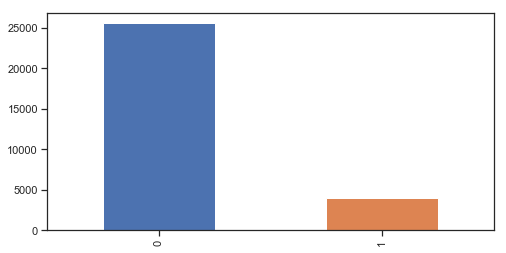

In [227]:
plt.figure(figsize=(8,4))
df['churn_flag'].value_counts().plot(kind = 'bar')

In [228]:
#plt.figure(figsize=(30, 10))
#plot_cat('arpu_6')

## arpu (Average Revenue per user)

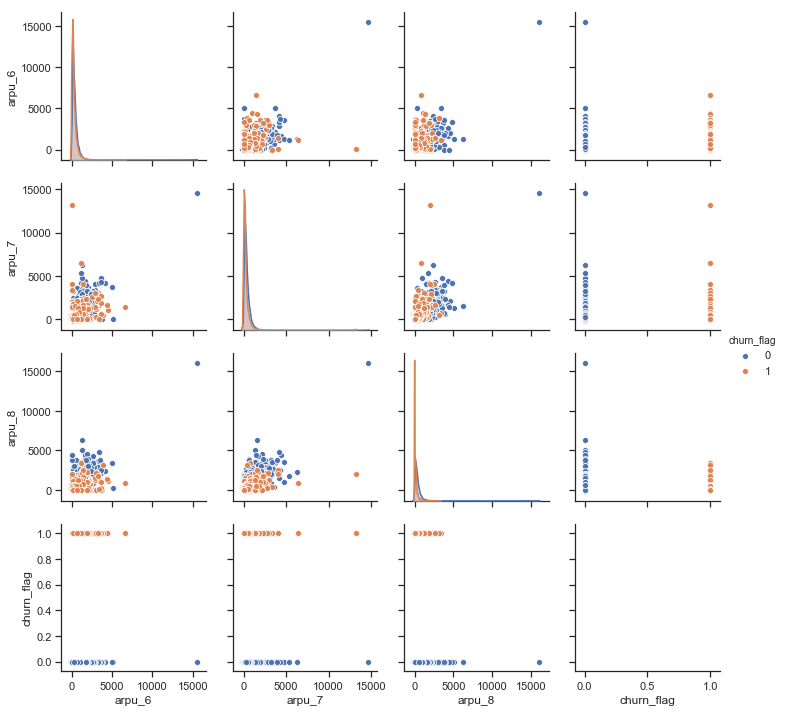

In [229]:
sns.pairplot(data=df[['arpu_6','arpu_7','arpu_8','churn_flag']],hue='churn_flag')

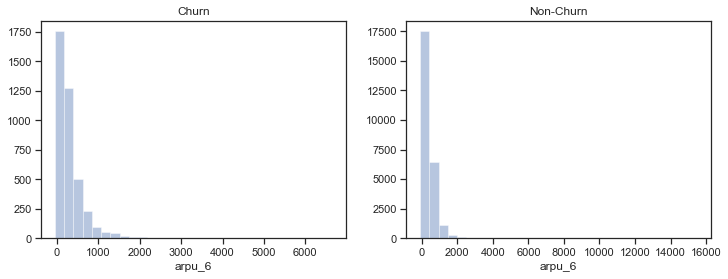

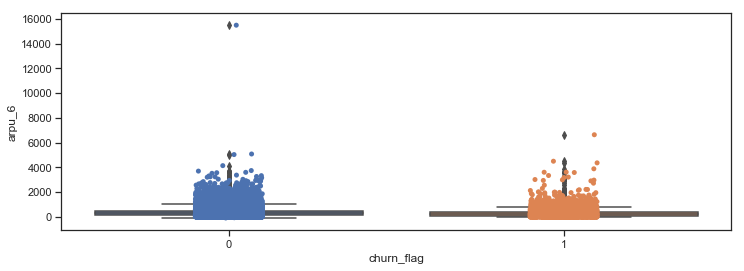

In [230]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['churn_flag']==1].arpu_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(df[df['churn_flag']==0].arpu_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn_flag', y='arpu_6', data=df)
sns.stripplot(x='churn_flag', y='arpu_6', data=df, jitter=True, edgecolor="gray")

## Derived features
Let's first start formating date features

In [231]:
df['date_of_last_rech_6'] = pd.to_datetime(df['date_of_last_rech_6'])
df['date_of_last_rech_7'] = pd.to_datetime(df['date_of_last_rech_7'])
df['date_of_last_rech_8'] = pd.to_datetime(df['date_of_last_rech_8'])

df['date_of_last_rech_data_6'] = pd.to_datetime(df['date_of_last_rech_data_6'])
df['date_of_last_rech_data_7'] = pd.to_datetime(df['date_of_last_rech_data_7'])
df['date_of_last_rech_data_8'] = pd.to_datetime(df['date_of_last_rech_data_8'])

df['mobile_number'] = df['mobile_number'].astype(str)

In [232]:
# Now let's create new features from date column
df['date_of_last_rech_day_6'] = df['date_of_last_rech_6'].dt.day
df['date_of_last_rech_dayofwk_6'] = df['date_of_last_rech_6'].dt.dayofweek.astype(str)

df['date_of_last_rech_day_7'] = df['date_of_last_rech_7'].dt.day
df['date_of_last_rech_dayofwk_7'] = df['date_of_last_rech_7'].dt.dayofweek.astype(str)

df['date_of_last_rech_day_8'] = df['date_of_last_rech_8'].dt.day
df['date_of_last_rech_dayofwk_8'] = df['date_of_last_rech_8'].dt.dayofweek.astype(str)

df['date_of_last_rech_data_day_6'] = df['date_of_last_rech_data_6'].dt.day
df['date_of_last_rech_data_dayofwk_6'] = df['date_of_last_rech_data_6'].dt.dayofweek.astype(str)

df['date_of_last_rech_data_day_7'] = df['date_of_last_rech_data_7'].dt.day
df['date_of_last_rech_data_dayofwk_7'] = df['date_of_last_rech_data_7'].dt.dayofweek.astype(str)

df['date_of_last_rech_data_day_8'] = df['date_of_last_rech_data_8'].dt.day
df['date_of_last_rech_data_dayofwk_8'] = df['date_of_last_rech_data_8'].dt.dayofweek.astype(str)


In [233]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29574 entries, 0 to 99998
Data columns (total 184 columns):
mobile_number                       29574 non-null object
circle_id                           29574 non-null int64
loc_og_t2o_mou                      29161 non-null float64
std_og_t2o_mou                      29161 non-null float64
loc_ic_t2o_mou                      29161 non-null float64
last_date_of_month_6                29574 non-null object
last_date_of_month_7                29521 non-null object
last_date_of_month_8                29349 non-null object
arpu_6                              29574 non-null float64
arpu_7                              29574 non-null float64
arpu_8                              29574 non-null float64
onnet_mou_6                         28519 non-null float64
onnet_mou_7                         28520 non-null float64
onnet_mou_8                         27836 non-null float64
offnet_mou_6                        28519 non-null float64
offnet_mou_

In [235]:
pd.options.display.float_format = '{:.2f}'.format
df.describe()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,amt_data_6,amt_data_7,avg_rech_amt_6and7,churn_flag,date_of_last_rech_day_6,date_of_last_rech_day_7,date_of_last_rech_day_8,date_of_last_rech_data_day_6,date_of_last_rech_data_day_7,date_of_last_rech_data_day_8
count,29574.00,29161.00,29161.00,29161.00,29574.00,29574.00,29574.00,28519.00,28520.00,27836.00,28519.00,28520.00,27836.00,28519.00,28520.00,27836.00,28519.00,28520.00,27836.00,28519.00,28520.00,27836.00,28519.00,28520.00,27836.00,28519.00,28520.00,27836.00,28519.00,28520.00,27836.00,28519.00,28520.00,27836.00,28519.00,28520.00,27836.00,28519.00,28520.00,27836.00,28519.00,28520.00,27836.00,28519.00,28520.00,27836.00,28519.00,28520.00,27836.00,28519.00,28520.00,27836.00,28519.00,28520.00,27836.00,28519.00,28520.00,27836.00,29574.00,29574.00,29574.00,28519.00,28520.00,27836.00,28519.00,28520.00,27836.00,28519.00,28520.00,27836.00,28519.00,28520.00,27836.00,28519.00,28520.00,27836.00,28519.00,28520.00,27836.00,28519.00,28520.00,27836.00,28519.00,28520.00,27836.00,28519.00,28520.00,27836.00,29574.00,29574.00,29574.00,28519.00,28520.00,27836.00,28519.00,28520.00,27836.00,28519.00,28520.00,27836.00,29574.00,29574.00,29574.00,29574.00,29574.00,29574.00,29574.00,29574.00,29574.00,29574.00,29574.00,29574.00,23804.00,24330.00,20183.00,23804.00,24330.00,20183.00,23804.00,24330.00,20183.00,29574.00,29574.00,29574.00,29574.00,29574.00,29574.00,23804.00,24330.00,20183.00,29574.00,24330.00,20183.00,23804.00,24330.00,20183.00,29574.00,29574.00,29574.00,29574.00,29574.00,29574.00,29574.00,29574.00,29574.00,29574.00,29574.00,29574.00,23804.00,24330.00,20183.00,29574.00,29574.00,29574.00,29574.00,23804.00,24330.00,20183.00,29574.00,29574.00,29574.00,29574.00,29406.00,29372.00,28847.00,23804.00,

In [236]:
#Let's check the correlation between features
joincorr= df.corr()
df_corr = joincorr.stack().reset_index().sort_values(by = 0, ascending = False)
df_corr[((df_corr[0] < 1) & (df_corr[0] >= 0.4)) | ((df_corr[0] <= -0.4) & (df_corr[0] > -1))]

,level_0,level_1,0
20805,sachet_2g_8,count_rech_2g_8,0.98
17037,count_rech_2g_8,sachet_2g_8,0.98
20646,sachet_2g_7,count_rech_2g_7,0.98
16878,count_rech_2g_7,sachet_2g_7,0.98
20487,sachet_2g_6,count_rech_2g_6,0.98
16719,count_rech_2g_6,sachet_2g_6,0.98
252,arpu_7,total_rech_amt_7,0.96
14853,total_rech_amt_7,arpu_7,0.96
411,arpu_8,total_rech_amt_8,0.96
15012,total_rech_amt_8,arpu_8,0.96


In [238]:
#Let's create new features from good month and compare them with action phase
df['avg_arpu_6and7'] =df[['arpu_6','arpu_7']].mean(axis=1)
df['is_arpu_flag'] = np.where((df['arpu_8'] > df['avg_arpu_6and7']), 0, 1)

df['avg_onnet_mou_6and7'] = df[['onnet_mou_6','onnet_mou_7']].mean(axis=1)
df['is_onnet_mou_flag'] = np.where((df['onnet_mou_8'] > df['avg_onnet_mou_6and7']), 0, 1)

df['avg_offnet_mou_6and7'] = df[['offnet_mou_6','offnet_mou_7']].mean(axis=1)
df['is_offnet_mou_flag'] = np.where((df['offnet_mou_8'] > df['avg_offnet_mou_6and7']), 0, 1)

df['avg_roam_ic_mou_6and7'] = df[['roam_ic_mou_6','roam_ic_mou_7']].mean(axis=1)
df['is_roam_ic_mou_flag'] = np.where((df['roam_ic_mou_8'] > df['avg_roam_ic_mou_6and7']), 0, 1)

df['avg_roam_og_mou_6and7'] = df[['roam_og_mou_6','roam_og_mou_7']].mean(axis=1)
df['is_roam_og_mou_flag'] = np.where((df['roam_og_mou_8'] > df['avg_roam_og_mou_6and7']), 0, 1)

df['avg_loc_og_t2t_mou_6and7'] = df[['loc_og_t2t_mou_6','loc_og_t2t_mou_7']].mean(axis=1)
df['is_loc_og_t2t_mou_flag'] = np.where((df['loc_og_t2t_mou_8'] > df['avg_loc_og_t2t_mou_6and7']), 0, 1)

df['avg_loc_og_t2m_mou_6and7'] = df[['loc_og_t2m_mou_6','loc_og_t2m_mou_7']].mean(axis=1)
df['is_loc_og_t2m_mou_flag'] = np.where((df['loc_og_t2m_mou_8'] > df['avg_loc_og_t2m_mou_6and7']), 0, 1)

df['avg_loc_og_t2f_mou_6and7'] = df[['loc_og_t2f_mou_6','loc_og_t2f_mou_7']].mean(axis=1)
df['is_loc_og_t2f_mou_flag'] = np.where((df['loc_og_t2f_mou_8'] > df['avg_loc_og_t2f_mou_6and7']), 0, 1)

df['avg_loc_og_t2c_mou_6and7'] = df[['loc_og_t2c_mou_6','loc_og_t2c_mou_7']].mean(axis=1)
df['is_loc_og_t2c_mou_flag'] = np.where((df['loc_og_t2c_mou_8'] > df['avg_loc_og_t2c_mou_6and7']), 0, 1)

df['avg_std_og_t2t_mou_6and7'] = df[['std_og_t2t_mou_6','std_og_t2t_mou_7']].mean(axis=1)
df['is_std_og_t2t_mou_flag'] = np.where((df['std_og_t2t_mou_8'] > df['avg_std_og_t2t_mou_6and7']), 0, 1)

df['avg_std_og_t2m_mou_6and7'] = df[['std_og_t2m_mou_6','std_og_t2m_mou_7']].mean(axis=1)
df['is_std_og_t2m_mou_flag'] = np.where((df['std_og_t2m_mou_8'] > df['avg_std_og_t2m_mou_6and7']), 0, 1)

df['avg_std_og_t2f_mou_6and7'] = df[['std_og_t2f_mou_6','std_og_t2f_mou_7']].mean(axis=1)
df['is_std_og_t2f_mou_flag'] = np.where((df['std_og_t2f_mou_8'] > df['avg_std_og_t2f_mou_6and7']), 0, 1)

df['avg_isd_og_mou_6and7'] = df[['isd_og_mou_6','isd_og_mou_7']].mean(axis=1)
df['is_isd_og_mou_flag'] = np.where((df['isd_og_mou_8'] > df['avg_isd_og_mou_6and7']), 0, 1)

df['avg_spl_og_mou_6and7'] = df[['spl_og_mou_6','spl_og_mou_7']].mean(axis=1)
df['is_spl_og_mou_flag'] = np.where((df['spl_og_mou_8'] > df['avg_spl_og_mou_6and7']), 0, 1)

df['avg_og_others_6and7'] = df[['og_others_6','og_others_7']].mean(axis=1)
df['is_og_others_flag'] = np.where((df['og_others_8'] > df['avg_og_others_6and7']), 0, 1)


df['avg_loc_ic_t2t_mou_6and7'] = df[['loc_ic_t2t_mou_6','loc_ic_t2t_mou_7']].mean(axis=1)
df['is_loc_ic_t2t_mou_flag'] = np.where((df['loc_ic_t2t_mou_8'] > df['avg_loc_ic_t2t_mou_6and7']), 0, 1)

df['avg_loc_ic_t2m_mou_6and7'] = df[['loc_ic_t2m_mou_6','loc_ic_t2m_mou_7']].mean(axis=1)
df['is_loc_ic_t2m_mou_flag'] = np.where((df['loc_ic_t2m_mou_8'] > df['avg_loc_ic_t2m_mou_6and7']), 0, 1)

df['avg_loc_ic_t2f_mou_6and7'] = df[['loc_ic_t2f_mou_6','loc_ic_t2f_mou_7']].mean(axis=1)
df['is_loc_ic_t2f_mou_flag'] = np.where((df['loc_ic_t2f_mou_8'] > df['avg_loc_ic_t2f_mou_6and7']), 0, 1)

df['avg_std_ic_t2t_mou_6and7'] = df[['std_ic_t2t_mou_6','std_ic_t2t_mou_7']].mean(axis=1)
df['is_std_ic_t2t_mou_flag'] = np.where((df['std_ic_t2t_mou_8'] > df['avg_std_ic_t2t_mou_6and7']), 0, 1)

df['avg_std_ic_t2m_mou_6and7'] = df[['std_ic_t2m_mou_6','std_ic_t2m_mou_7']].mean(axis=1)
df['is_std_ic_t2m_mou_flag'] = np.where((df['std_ic_t2m_mou_8'] > df['avg_std_ic_t2m_mou_6and7']), 0, 1)

df['avg_std_ic_t2f_mou_6and7'] = df[['std_ic_t2f_mou_6','std_ic_t2f_mou_7']].mean(axis=1)
df['is_std_ic_t2f_mou_flag'] = np.where((df['std_ic_t2f_mou_8'] > df['avg_std_ic_t2f_mou_6and7']), 0, 1)

df['avg_spl_ic_mou_6and7'] =df[['spl_ic_mou_6','spl_ic_mou_7']].mean(axis=1)
df['is_spl_ic_mou_flag'] = np.where((df['spl_ic_mou_8'] > df['avg_spl_ic_mou_6and7']), 0, 1)

df['avg_isd_ic_mou_6and7'] = df[['isd_ic_mou_6','isd_ic_mou_7']].mean(axis=1)
df['is_isd_ic_mou_flag'] = np.where((df['isd_ic_mou_8'] > df['avg_isd_ic_mou_6and7']), 0, 1)

df['avg_ic_others_6and7'] = df[['ic_others_6','ic_others_7']].mean(axis=1)
df['is_ic_others_flag'] = np.where((df['ic_others_8'] > df['avg_ic_others_6and7']), 0, 1)

df['avg_total_rech_amt_6and7'] = df[['total_rech_amt_6','total_rech_amt_7']].mean(axis=1)
df['is_total_rech_amt_flag'] = np.where((df['total_rech_amt_8'] > df['avg_total_rech_amt_6and7']), 0, 1)

df['avg_vol_2g_mb_6and7'] = df[['vol_2g_mb_6','vol_2g_mb_7']].mean(axis=1)
df['is_vol_2g_mb_flag'] = np.where((df['vol_2g_mb_8'] > df['avg_vol_2g_mb_6and7']), 0, 1)

df['avg_vol_3g_mb_6and7'] = df[['vol_3g_mb_6','vol_3g_mb_7']].mean(axis=1)
df['is_vol_3g_mb_flag'] = np.where((df['vol_3g_mb_8'] > df['avg_vol_3g_mb_6and7']), 0, 1)

df['avg_arpu_3g_6and7'] = df[['arpu_3g_6','arpu_3g_7']].mean(axis=1)
df['is_arpu_3g_flag'] = np.where((df['arpu_3g_8'] > df['avg_arpu_3g_6and7']), 0, 1)

df['avg_arpu_2g_6and7'] = df[['arpu_2g_6','arpu_2g_7']].mean(axis=1)
df['is_arpu_2g_flag'] = np.where((df['arpu_2g_8'] > df['avg_arpu_2g_6and7']), 0, 1)

df['avg_vbc_3g_6and7'] = df[['jun_vbc_3g','jul_vbc_3g']].mean(axis=1)
df['is_vbc_3g_flag'] = np.where((df['aug_vbc_3g'] > df['avg_vbc_3g_6and7']), 0, 1)

df['avg_loc_og_mou_6and7'] = df[['loc_og_mou_6','loc_og_mou_7']].mean(axis=1)
df['is_loc_og_mou_flag'] = np.where((df['loc_og_mou_8'] > df['avg_loc_og_mou_6and7']), 0, 1)

df['avg_std_og_mou_6and7'] = df[['std_og_mou_6','std_og_mou_7']].mean(axis=1)
df['is_std_og_mou_flag'] = np.where((df['std_og_mou_8'] > df['avg_std_og_mou_6and7']), 0, 1)

df['avg_total_og_mou_6and7'] = df[['total_og_mou_6','total_og_mou_7']].mean(axis=1)
df['is_total_og_mou_flag'] = np.where((df['total_og_mou_8'] > df['avg_total_og_mou_6and7']), 0, 1)

df['avg_loc_ic_mou_6and7'] = df[['loc_ic_mou_6','loc_ic_mou_7']].mean(axis=1)
df['is_loc_ic_mou_flag'] = np.where((df['loc_ic_mou_8'] > df['avg_loc_ic_mou_6and7']), 0, 1)

df['avg_std_ic_mou_6and7'] = df[['std_ic_mou_6','std_ic_mou_7']].mean(axis=1)
df['is_std_ic_mou_flag'] = np.where((df['std_ic_mou_8'] > df['avg_std_ic_mou_6and7']), 0, 1)

df['avg_total_ic_mou_6and7'] = df[['total_ic_mou_6','total_ic_mou_7']].mean(axis=1)
df['is_total_ic_mou_flag'] = np.where((df['total_ic_mou_8'] > df['avg_total_ic_mou_6and7']), 0, 1)

df['avg_night_pck_user_6and7'] = df[['night_pck_user_6','night_pck_user_7']].mean(axis=1)
df['is_night_pck_user_flag'] = np.where((df['night_pck_user_8'] > df['avg_night_pck_user_6and7']), 0, 1)

df['avg_monthly_2g_6and7'] = df[['monthly_2g_6','monthly_2g_7']].mean(axis=1)
df['is_monthly_2g_flag'] = np.where((df['monthly_2g_8'] > df['avg_monthly_2g_6and7']), 0, 1)

df['avg_sachet_2g_6and7'] = df[['sachet_2g_6','sachet_2g_7']].mean(axis=1)
df['is_sachet_2g_flag'] = np.where((df['sachet_2g_8'] > df['avg_sachet_2g_6and7']), 0, 1)

df['avg_monthly_3g_6and7'] = df[['monthly_3g_6','monthly_3g_7']].mean(axis=1)
df['is_monthly_3g_flag'] = np.where((df['monthly_3g_8'] > df['avg_monthly_3g_6and7']), 0, 1)

df['avg_sachet_3g_6and7'] = df[['sachet_3g_6','sachet_3g_7']].mean(axis=1)
df['is_sachet_3g_flag'] = np.where((df['sachet_3g_8'] > df['avg_sachet_3g_6and7']), 0, 1)

df['avg_fb_user_6and7'] = df[['fb_user_6','fb_user_7']].mean(axis=1)
df['is_fb_user_flag'] = np.where((df['fb_user_8'] > df['avg_fb_user_6and7']), 0, 1)


In [239]:
# Create month on month change features to understand any risk associated with the churn
df['loc_og_t2t_mou_7diff6'] = df['loc_og_t2t_mou_7'] -df['loc_og_t2t_mou_6']
df['loc_og_t2m_mou_7diff6'] = df['loc_og_t2m_mou_7'] - df['loc_og_t2m_mou_6']
df['loc_og_t2f_mou_7diff6'] = df['loc_og_t2f_mou_7'] - df['loc_og_t2f_mou_6']
df['loc_og_t2c_mou_7diff6'] = df['loc_og_t2c_mou_7'] - df['loc_og_t2c_mou_6']
df['loc_og_mou_7diff6'] = df['loc_og_mou_7'] - df['loc_og_mou_6']
df['std_og_t2t_mou_7diff6'] = df['std_og_t2t_mou_7'] - df['std_og_t2t_mou_6']
df['std_og_t2m_mou_7diff6'] = df['std_og_t2m_mou_7'] - df['std_og_t2m_mou_6']
df['std_og_t2f_mou_7diff6'] = df['std_og_t2f_mou_7'] - df['std_og_t2f_mou_6']
df['std_og_mou_7diff6'] = df['std_og_mou_7'] - df['std_og_mou_6']
df['loc_og_mou_7diff6'] = df['loc_og_mou_7'] - df['loc_og_mou_6']
df['std_og_mou_7diff6'] = df['std_og_mou_7'] - df['std_og_mou_6']
df['isd_og_mou_7diff6'] = df['isd_og_mou_7'] - df['isd_og_mou_6']
df['spl_og_mou_7diff6'] = df['spl_og_mou_7'] - df['spl_og_mou_6']
df['og_others_7diff6'] =df['og_others_7'] - df['og_others_6']
df['total_og_mou_7diff6'] =df['total_og_mou_7'] - df['total_og_mou_6']

df['loc_og_t2t_mou_8diff7'] = df['loc_og_t2t_mou_8'] -df['loc_og_t2t_mou_7']
df['loc_og_t2m_mou_8diff7'] =df['loc_og_t2m_mou_8'] - df['loc_og_t2m_mou_7']
df['loc_og_t2f_mou_8diff7'] = df['loc_og_t2f_mou_8'] - df['loc_og_t2f_mou_7']
df['loc_og_t2c_mou_8diff7'] =df['loc_og_t2c_mou_8'] - df['loc_og_t2c_mou_7']
df['loc_og_mou_8diff7'] = df['loc_og_mou_8'] - df['loc_og_mou_7']
df['std_og_t2t_mou_8diff7'] = df['std_og_t2t_mou_8'] - df['std_og_t2t_mou_7']
df['std_og_t2m_mou_8diff7'] = df['std_og_t2m_mou_8'] - df['std_og_t2m_mou_7']
df['std_og_t2f_mou_8diff7'] = df['std_og_t2f_mou_8'] - df['std_og_t2f_mou_7']
df['std_og_mou_8diff7'] = df['std_og_mou_8'] - df['std_og_mou_7']
df['loc_og_mou_8diff7'] = df['loc_og_mou_8'] -df['loc_og_mou_7']
df['std_og_mou_8diff7'] = df['std_og_mou_8'] - df['std_og_mou_7']
df['isd_og_mou_8diff7'] = df['isd_og_mou_8'] - df['isd_og_mou_7']
df['spl_og_mou_8diff7'] = df['spl_og_mou_8'] - df['spl_og_mou_7']
df['og_others_8diff7'] = df['og_others_8'] - df['og_others_7']
df['total_og_mou_8diff7'] = df['total_og_mou_8'] - df['total_og_mou_7']

df['loc_ic_t2t_mou_7diff6'] = df['loc_ic_t2t_mou_7'] - df['loc_ic_t2t_mou_6']
df['loc_ic_t2m_mou_7diff6'] = df['loc_ic_t2m_mou_7'] - df['loc_ic_t2m_mou_6']
df['loc_ic_t2f_mou_7diff6'] = df['loc_ic_t2f_mou_7'] - df['loc_ic_t2f_mou_6']
df['loc_ic_mou_7diff6'] = df['loc_ic_mou_7'] - df['loc_ic_mou_6']
df['std_ic_t2t_mou_7diff6'] = df['std_ic_t2t_mou_7'] - df['std_ic_t2t_mou_6']
df['std_ic_t2m_mou_7diff6'] = df['std_ic_t2m_mou_7'] - df['std_ic_t2m_mou_6']
df['std_ic_t2f_mou_7diff6'] = df['std_ic_t2f_mou_7'] - df['std_ic_t2f_mou_6']
df['std_ic_mou_7diff6'] = df['std_ic_mou_7'] - df['std_ic_mou_6']
df['loc_ic_mou_7diff6'] = df['loc_ic_mou_7'] - df['loc_ic_mou_6']
df['std_ic_mou_7diff6'] = df['std_ic_mou_7'] - df['std_ic_mou_6']
df['spl_ic_mou_7diff6'] = df['spl_ic_mou_7'] - df['spl_ic_mou_6']
df['isd_ic_mou_7diff6'] = df['isd_ic_mou_7'] - df['isd_ic_mou_6']
df['ic_others_7diff6'] = df['ic_others_7'] - df['ic_others_6']
df['total_ic_mou_7diff6'] = df['total_ic_mou_7'] - df['total_ic_mou_6']

df['loc_ic_t2t_mou_8diff7'] = df['loc_ic_t2t_mou_8'] - df['loc_ic_t2t_mou_7']
df['loc_ic_t2m_mou_8diff7'] = df['loc_ic_t2m_mou_8'] - df['loc_ic_t2m_mou_7']
df['loc_ic_t2f_mou_8diff7'] = df['loc_ic_t2f_mou_8'] - df['loc_ic_t2f_mou_7']
df['loc_ic_mou_8diff7'] = df['loc_ic_mou_8'] - df['loc_ic_mou_7']
df['std_ic_t2t_mou_8diff7'] = df['std_ic_t2t_mou_8'] - df['std_ic_t2t_mou_7']
df['std_ic_t2m_mou_8diff7'] = df['std_ic_t2m_mou_8'] - df['std_ic_t2m_mou_7']
df['std_ic_t2f_mou_8diff7'] = df['std_ic_t2f_mou_8'] -df['std_ic_t2f_mou_7']
df['std_ic_mou_8diff7'] = df['std_ic_mou_8'] - df['std_ic_mou_7']
df['loc_ic_mou_8diff7'] = df['loc_ic_mou_8'] - df['loc_ic_mou_7']
df['std_ic_mou_8diff7'] = df['std_ic_mou_8'] - df['std_ic_mou_7']
df['spl_ic_mou_8diff7'] = df['spl_ic_mou_8'] - df['spl_ic_mou_7']
df['isd_ic_mou_8diff7'] = df['isd_ic_mou_8'] - df['isd_ic_mou_7']
df['ic_others_8diff7'] =df['ic_others_8'] - df['ic_others_7']
df['total_ic_mou_8diff7'] = df['total_ic_mou_8'] - df['total_ic_mou_7']

df['onnet_mou_7diff6'] = df['onnet_mou_7'] - df['onnet_mou_6']
df['onnet_mou_8diff7'] = df['onnet_mou_8'] - df['onnet_mou_7']

df['offnet_mou_7diff6'] = df['offnet_mou_7'] -df['offnet_mou_6']
df['offnet_mou_8diff7'] = df['offnet_mou_8'] -df['offnet_mou_7']

df['roam_ic_mou_7diff6'] = df['roam_ic_mou_7'] - df['roam_ic_mou_6']
df['roam_ic_mou_8diff7'] = df['roam_ic_mou_8'] - df['roam_ic_mou_7']

df['roam_og_mou_7diff6'] = df['roam_og_mou_7'] - df['roam_og_mou_6']
df['roam_og_mou_8diff7'] = df['roam_og_mou_8'] - df['roam_og_mou_7']

df['total_rech_amt_7diff6'] = df['total_rech_amt_7'] - df['total_rech_amt_6']
df['total_rech_amt_8diff7'] = df['total_rech_amt_8'] - df['total_rech_amt_7']

df['date_of_last_rech_7diff6'] = (df['date_of_last_rech_7'] - df['date_of_last_rech_6']).dt.days
df['date_of_last_rech_8diff7'] = (df['date_of_last_rech_8'] - df['date_of_last_rech_7']).dt.days

df['date_of_last_rech_data_7diff6'] = (df['date_of_last_rech_data_7'] - df['date_of_last_rech_data_6']).dt.days
df['date_of_last_rech_data_8diff7'] = (df['date_of_last_rech_data_8'] - df['date_of_last_rech_data_7']).dt.days

df['vol_2g_mb_7diff6'] = df['vol_2g_mb_7'] - df['vol_2g_mb_6']
df['vol_2g_mb_8diff7'] =df['vol_2g_mb_8'] - df['vol_2g_mb_7']

df['vol_3g_mb_7diff6'] =df['vol_3g_mb_7'] - df['vol_3g_mb_6']
df['vol_3g_mb_8diff7'] = df['vol_3g_mb_8'] - df['vol_3g_mb_7']

df['vbc_3g_7diff6'] =df['jul_vbc_3g'] - df['jun_vbc_3g']
df['vbc_3g_8diff7'] = df['aug_vbc_3g'] - df['jul_vbc_3g']


## Feature Selection

 feature selection techniques could be used to reduce the number of features

Let's drop date related features as we derived new features out of it

In [240]:
df.drop(list(df.select_dtypes(include=['datetime64']).columns),axis=1,inplace=True)

Since we have the good data for both month 6, 7 as average, we dont need the raw columns, so dropping them

In [241]:
df.drop(['arpu_6','arpu_7','onnet_mou_6','onnet_mou_7','offnet_mou_6','offnet_mou_7',
         'roam_ic_mou_6','roam_ic_mou_7','roam_og_mou_6','roam_og_mou_7',
         'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2m_mou_6','loc_og_t2m_mou_7',
         'loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2c_mou_6','loc_og_t2c_mou_7',
         'std_og_t2t_mou_6','std_og_t2t_mou_7', 'std_og_t2m_mou_6','std_og_t2m_mou_7',
         'std_og_t2f_mou_6','std_og_t2f_mou_7','isd_og_mou_6','isd_og_mou_7',
         'spl_og_mou_6','spl_og_mou_7', 'og_others_6','og_others_7',
         'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7',
         'loc_ic_t2f_mou_6','loc_ic_t2f_mou_7', 'std_ic_t2t_mou_6','std_ic_t2t_mou_7',
         'std_ic_t2m_mou_6','std_ic_t2m_mou_7', 'std_ic_t2f_mou_6','std_ic_t2f_mou_7',
         'spl_ic_mou_6','spl_ic_mou_7', 'isd_ic_mou_6','isd_ic_mou_7',
         'ic_others_6','ic_others_7', 'total_rech_amt_6','total_rech_amt_7',
         'vol_2g_mb_6','vol_2g_mb_7', 'vol_3g_mb_6','vol_3g_mb_7',
         'arpu_3g_6','arpu_3g_7', 'arpu_2g_6','arpu_2g_7',
         'jun_vbc_3g','jul_vbc_3g', 'loc_og_mou_6', 'loc_og_mou_7','std_og_mou_6', 'std_og_mou_7',
          'total_og_mou_6', 'total_og_mou_7','loc_ic_mou_6', 'loc_ic_mou_7',
          'std_ic_mou_6', 'std_ic_mou_7','total_ic_mou_6', 'total_ic_mou_7',
          'total_rech_num_6', 'total_rech_num_7','night_pck_user_6', 'night_pck_user_7',
          'monthly_2g_6', 'monthly_2g_7','sachet_2g_6', 'sachet_2g_7',
          'monthly_3g_6', 'monthly_3g_7','sachet_3g_6', 'sachet_3g_7','fb_user_6', 'fb_user_7'
        ], axis=1, inplace=True)

In [242]:
df.shape

(29574, 246)

In [243]:
correlation_matrix = df.corr()
AbsoluteCorrelationMatrix = correlation_matrix.abs()
AbsoluteCorrelationMatrix = AbsoluteCorrelationMatrix.where(np.triu(np.ones(AbsoluteCorrelationMatrix.shape), k=1).astype(np.bool))
highCorrelatedIndices = np.where(AbsoluteCorrelationMatrix > 0.8)
correlated_pairs = [(AbsoluteCorrelationMatrix.index[x], AbsoluteCorrelationMatrix.columns[y]) 
                     for x,y in zip(*highCorrelatedIndices) if x!=y and x < y]

print("Total Number of correlated pairs: ", len(correlated_pairs))
print(correlated_pairs)

Total Number of correlated pairs:  42
[('arpu_8', 'total_rech_amt_8'), ('offnet_mou_8', 'std_og_t2m_mou_8'), ('loc_og_t2t_mou_8', 'avg_loc_og_t2t_mou_6and7'), ('loc_og_mou_8', 'avg_loc_og_mou_6and7'), ('isd_og_mou_8', 'avg_isd_og_mou_6and7'), ('loc_ic_t2t_mou_8', 'avg_loc_ic_t2t_mou_6and7'), ('loc_ic_t2m_mou_8', 'loc_ic_mou_8'), ('loc_ic_mou_8', 'total_ic_mou_8'), ('loc_ic_mou_8', 'avg_loc_ic_mou_6and7'), ('std_ic_t2m_mou_8', 'std_ic_mou_8'), ('total_ic_mou_8', 'avg_total_ic_mou_6and7'), ('count_rech_2g_6', 'avg_sachet_2g_6and7'), ('count_rech_2g_7', 'avg_sachet_2g_6and7'), ('count_rech_2g_8', 'sachet_2g_8'), ('count_rech_3g_8', 'sachet_3g_8'), ('arpu_3g_8', 'arpu_2g_8'), ('arpu_3g_8', 'monthly_3g_8'), ('arpu_2g_8', 'monthly_3g_8'), ('total_rech_data_amt_6', 'amt_data_6'), ('total_rech_data_amt_6', 'avg_rech_amt_6and7'), ('total_rech_data_amt_7', 'amt_data_7'), ('total_rech_data_amt_7', 'avg_rech_amt_6and7'), ('amt_data_6', 'avg_rech_amt_6and7'), ('amt_data_7', 'avg_rech_amt_6and7'), (

In [244]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

In [245]:
df.drop(columns=to_drop, axis=1,inplace=True)
df.shape

(29574, 228)

In [246]:
df.drop(columns = list(df.select_dtypes(include=['category']).columns), axis =1, inplace = True)

In [247]:
list(df.select_dtypes(include=[object]).columns)

['mobile_number',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'date_of_last_rech_dayofwk_6',
 'date_of_last_rech_dayofwk_7',
 'date_of_last_rech_dayofwk_8',
 'date_of_last_rech_data_dayofwk_6',
 'date_of_last_rech_data_dayofwk_7',
 'date_of_last_rech_data_dayofwk_8']

In [248]:
df.drop(columns = list(df.select_dtypes(include=[object]).columns), axis = 1, inplace = True)

In [250]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29574 entries, 0 to 99998
Data columns (total 218 columns):
circle_id                        int64
loc_og_t2o_mou                   float64
std_og_t2o_mou                   float64
loc_ic_t2o_mou                   float64
arpu_8                           float64
onnet_mou_8                      float64
offnet_mou_8                     float64
roam_ic_mou_8                    float64
roam_og_mou_8                    float64
loc_og_t2t_mou_8                 float64
loc_og_t2m_mou_8                 float64
loc_og_t2f_mou_8                 float64
loc_og_t2c_mou_8                 float64
loc_og_mou_8                     float64
std_og_t2t_mou_8                 float64
std_og_t2m_mou_8                 float64
std_og_t2f_mou_8                 float64
std_og_t2c_mou_6                 float64
std_og_t2c_mou_7                 float64
std_og_t2c_mou_8                 float64
std_og_mou_8                     float64
isd_og_mou_8                   

Replace all missing values with zero as discussed above

In [251]:
df.replace([np.inf, -np.inf], np.nan,inplace=True)
df.fillna(0,inplace=True)

In [252]:
df.isnull().values.any()

False

In [253]:
df.shape

(29574, 218)

## Model Building

In [254]:
X = df[df.columns[~df.columns.isin(['churn_flag'])]]
y = df['churn_flag']

### Feature Scaling
We will now train different models on this dataset.

Scaling all values will reduce the distortion due to exceptionally high values and make algorithms converge faster.

In [255]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

We will split the data into a training and a test part. 

In [256]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std,y, train_size=0.7,test_size=0.3,random_state=1)

In [257]:
print("Training dataset size",X_train.shape)
print("Training dataset target size",y_train.shape)
print("Test dataset size",X_test.shape)
print("Test dataset target size",y_test.shape)

Training dataset size (20701, 217)
Training dataset target size (20701,)
Test dataset size (8873, 217)
Test dataset target size (8873,)


## PCA

Reduce the number of variables using PCA.

In [258]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [259]:
#Performing the PCA
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [260]:
#List of PCA components.
pca.components_

array([[-9.82937454e-17, -0.00000000e+00,  1.38777878e-17, ...,
         3.73679918e-02,  1.71371976e-02,  2.23550388e-02],
       [-9.21762938e-18, -5.55111512e-17, -3.33066907e-16, ...,
         1.64567256e-02,  8.50485215e-03, -3.66793457e-03],
       [-5.18269416e-18, -2.08166817e-17,  4.99600361e-16, ...,
        -6.05909987e-02, -1.18596082e-02, -4.39730935e-02],
       ...,
       [-0.00000000e+00,  3.20909307e-01, -6.89774998e-02, ...,
        -2.57316362e-02,  9.98560606e-02,  1.90506149e-01],
       [-0.00000000e+00, -1.63297445e-01, -5.66080609e-02, ...,
        -2.07502859e-01,  6.18788809e-02,  1.18052998e-01],
       [-0.00000000e+00, -6.00858213e-01, -3.53081151e-02, ...,
        -6.97953761e-02,  4.11263305e-02,  7.84611248e-02]])

In [261]:
#Let's check the variance ratios
pca.explained_variance_ratio_

array([6.61222370e-02, 4.52604527e-02, 4.27629514e-02, 3.13348371e-02,
       2.68236477e-02, 2.54065786e-02, 2.18387467e-02, 1.73407344e-02,
       1.62197195e-02, 1.56071143e-02, 1.44366115e-02, 1.40420553e-02,
       1.36607457e-02, 1.33166758e-02, 1.28507932e-02, 1.26045887e-02,
       1.23274784e-02, 1.18921352e-02, 1.16546224e-02, 1.14250759e-02,
       1.10384322e-02, 1.06887564e-02, 1.06021631e-02, 1.03004154e-02,
       9.98399777e-03, 9.92494746e-03, 9.75328345e-03, 9.52317094e-03,
       9.38742357e-03, 9.15009267e-03, 8.96215392e-03, 8.82436043e-03,
       8.61320981e-03, 8.43215125e-03, 8.36007244e-03, 8.29493318e-03,
       8.14625038e-03, 8.10660236e-03, 7.89769639e-03, 7.86381829e-03,
       7.67492498e-03, 7.55466734e-03, 7.47280590e-03, 7.30806383e-03,
       7.23628802e-03, 7.19254554e-03, 7.02902132e-03, 6.86134509e-03,
       6.73165609e-03, 6.71524778e-03, 6.49556587e-03, 6.39252926e-03,
       6.32423760e-03, 6.23685167e-03, 6.15774887e-03, 6.03957736e-03,
      

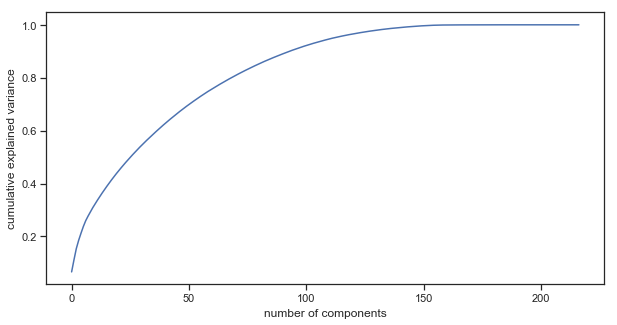

In [262]:
#Plotting the scree plot
%matplotlib inline
fig = plt.figure(figsize = (10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [263]:
#colnames = list(X.columns)
#pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
#pcs_df.head()
colnames = list(X.columns)
pcs_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1]})
pcs_df.head()

,Feature,PC1,PC2
0,circle_id,-0.00,-0.00
1,loc_og_t2o_mou,-0.00,-0.00
2,std_og_t2o_mou,0.00,-0.00
3,loc_ic_t2o_mou,-0.00,0.00
4,arpu_8,0.23,0.01


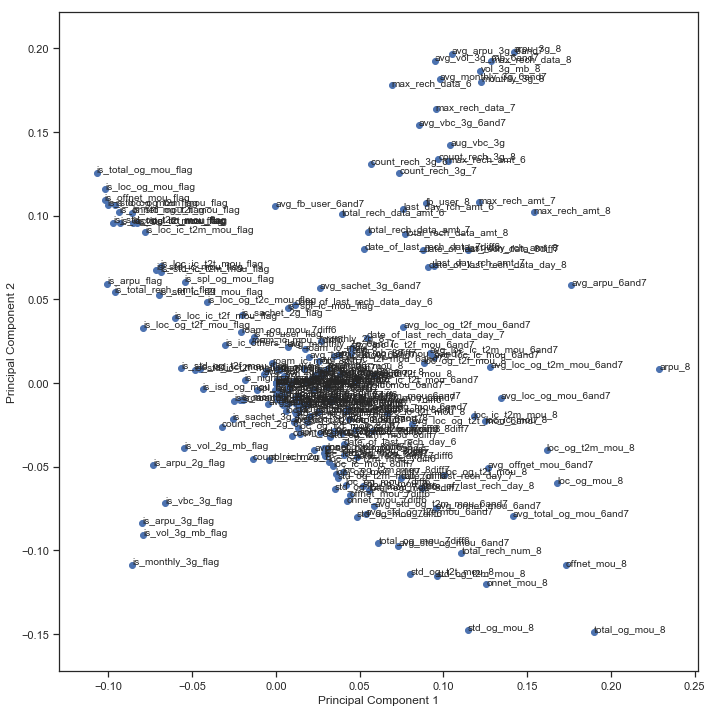

In [264]:
# Let's plot them to visualise how these features are loaded
%matplotlib inline
fig = plt.figure(figsize = (10,10))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [265]:
#Finally let's go ahead and do dimenstionality reduction using the two Principal Components
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=54)

In [266]:
df_pca = pca_final.fit_transform(X_train)
df_pca.shape

(20701, 54)

In [267]:
df_pca

array([[ 7.27610458, -1.39893618, -1.28164002, ...,  0.33620732,
         0.27280008,  0.73881285],
       [ 2.65714549,  5.30400876, -0.68362464, ...,  1.58150078,
        -0.85597665,  0.03544881],
       [-1.74969792, -1.08317618,  0.83825444, ...,  1.52123756,
        -0.57511472,  0.43114828],
       ...,
       [ 0.81081921, -2.96325521, -0.99248664, ..., -0.17205035,
         0.64329879,  0.24272701],
       [-0.43902001,  0.56871779, -0.87632591, ...,  0.86946555,
         0.46101326, -0.24919257],
       [-1.6517434 ,  2.96486156, -0.76060814, ...,  0.30861271,
         0.60815072,  0.21700371]])

In [268]:
#Creating a transpose so that the each column is properly arranged
pc = np.transpose(df_pca)

In [269]:
pcs_df2 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1]})

In [270]:
pcs_df2.head()

,PC1,PC2
0,7.28,-1.40
1,2.66,5.30
2,-1.75,-1.08
3,4.61,-3.84
4,-4.50,0.34


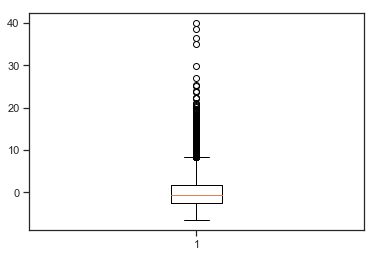

In [271]:
## Let's perform Outlier Analysis
#Let's do the outlier analysis before proceeding to clustering

plt.boxplot(pcs_df2.PC1)
Q1 = pcs_df2.PC1.quantile(0.05)
Q3 = pcs_df2.PC1.quantile(0.95)
IQR = Q3 - Q1
pcs_df2 = pcs_df2[(pcs_df2.PC1 >= Q1) & (pcs_df2.PC1 <= Q3)]

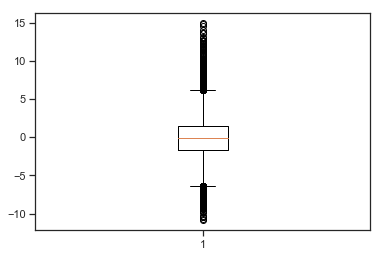

In [272]:
plt.boxplot(pcs_df2.PC2)
Q1 = pcs_df2.PC2.quantile(0.05)
Q3 = pcs_df2.PC2.quantile(0.95)
IQR = Q3 - Q1
pcs_df2 = pcs_df2[(pcs_df2.PC2 >= Q1) & (pcs_df2.PC2 <= Q3)]

In [273]:
pcs_df2.shape

(16767, 2)

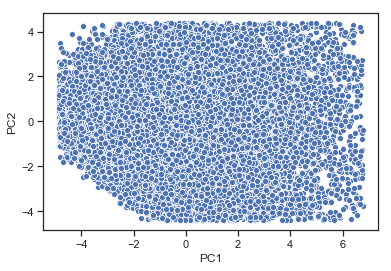

In [274]:
#Visualising the points on the PCs.
# one of the prime advatanges of PCA is that you can visualise high dimensional data
sns.scatterplot(x='PC1',y='PC2',data=pcs_df2)

In [275]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_pca.transpose())

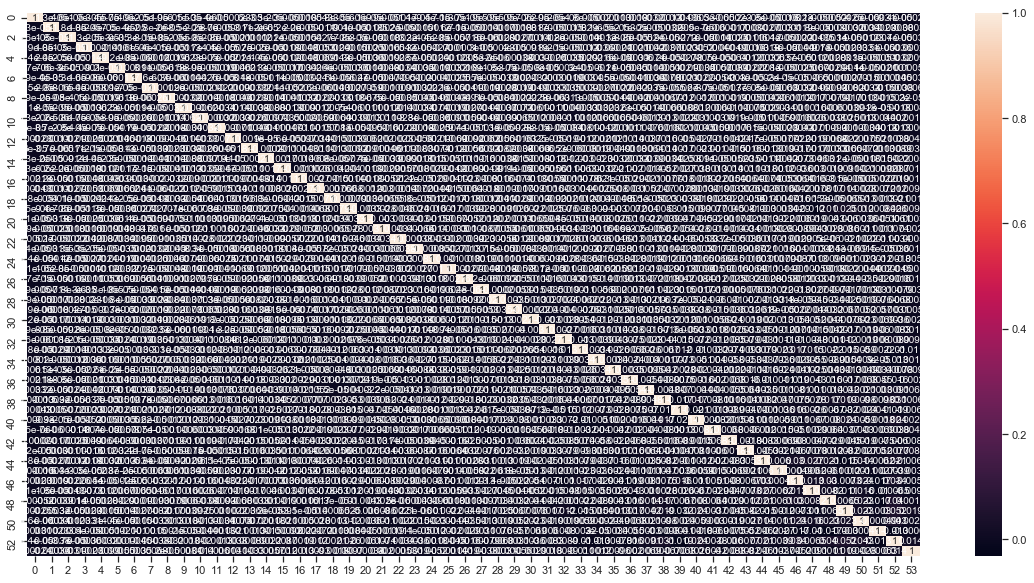

In [276]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [277]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.052409197446831306 , min corr:  -0.032183015247162335


In [278]:
#Applying selected components to the test data
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8873, 54)

## Logistic Regression

Applying a logistic regression on our Principal Components
We expect to get similar model performance with significantly lower features
If we can do so, we would have done effective dimensionality reduction without losing any import information

In [279]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_pca,y_train)

Note that we are fitting the original variable y with the transformed variables (principal components). This is not a problem becuase the transformation done in PCA is linear, which implies that you've only changed the way the new x variables are represented, though the nature of relationship between X and Y is still linear.

In [280]:
#Making prediction on the test data
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.88'

So there it is - a very similar result, without all the hassles. We have not only achieved dimensionality reduction, but also saved a lot of effort on feature selection.
Before closing, let's also visualize the data to see if we can spot any patterns

In [281]:
pca_last1 = PCA(n_components=40)
df_train_pca1 = pca_last1.fit_transform(X_train)
df_test_pca1 = pca_last1.transform(X_test)
df_test_pca1.shape

(8873, 40)

In [282]:
#training the regression model
learner_pca1 = LogisticRegression()
model_pca1 = learner_pca1.fit(df_train_pca1,y_train)
#Making prediction on the test data
pred_probs_test1 = model_pca1.predict_proba(df_test_pca1)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test1))

'0.88'

In [283]:
pca_last2 = PCA(n_components=10)
df_train_pca2 = pca_last2.fit_transform(X_train)
df_test_pca2 = pca_last2.transform(X_test)
df_test_pca2.shape

(8873, 10)

In [284]:
#training the regression model
learner_pca2 = LogisticRegression()
model_pca2 = learner_pca2.fit(df_train_pca2,y_train)
#Making prediction on the test data
pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test2))

'0.87'

In [285]:
import statsmodels.api as sm

In [286]:
from scipy.stats import norm
from scipy import stats

import sklearn
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


## Feature Selection Using RFE

In [287]:
logmodel_CW_dict = LogisticRegression(class_weight='balanced',penalty='l2',random_state=9999,solver='newton-cg',C=10000000,n_jobs=-1)

In [288]:
logmodel_CW_dict.fit(df_pca,y_train)

LogisticRegression(C=10000000, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=-1, penalty='l2', random_state=9999,
          solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)

              precision    recall  f1-score   support

           0       0.97      0.79      0.87      7677
           1       0.38      0.82      0.52      1196

   micro avg       0.79      0.79      0.79      8873
   macro avg       0.67      0.81      0.69      8873
weighted avg       0.89      0.79      0.82      8873

Accuracy for the test dataset 79.5%
ROC for the test dataset 80.6%


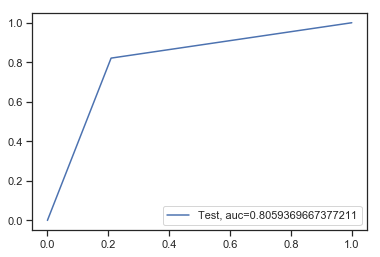

In [289]:
predictions = logmodel_CW_dict.predict(df_test_pca)
prediction_probs = logmodel_CW_dict.predict_proba(df_test_pca)[:,1]
print(classification_report(y_test, predictions))
accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()


 feture selection rfe accuracy is 80%

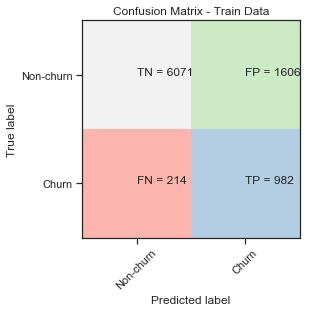

In [290]:
cm = confusion_matrix(y_test, predictions)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Train Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show()

## support vector machine(svm)

Support Vector Machine
Support Vector Machine (SVM) is an algorithm used for classification problems similar to Logistic Regression (LR). LR and SVM with linear Kernel generally perform comparably in practice.
The objective of the support vector machine algorithm is to find the hyperplane that has the maximum margin in an N-dimensional space that distinctly classifies the data points. Data points falling on either side of the hyperplane can be attributed to different classes.
The dimension of the hyperplane depends upon the number of features. If the number of input features is 2, then the hyperplane is just a line. If the number of input features is 3, then the hyperplane becomes a two-dimensional plane. Support vectors are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. Using these support vectors, we maximize the margin of the classifier. Deleting the support vectors will change the position of the hyperplane.

In [291]:
from sklearn import svm 

svm_linear = svm.SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      7677
           1       0.81      0.20      0.32      1196

   micro avg       0.89      0.89      0.89      8873
   macro avg       0.85      0.60      0.63      8873
weighted avg       0.88      0.89      0.86      8873

Accuracy for the test dataset 88.6%
ROC for the test dataset 59.8%


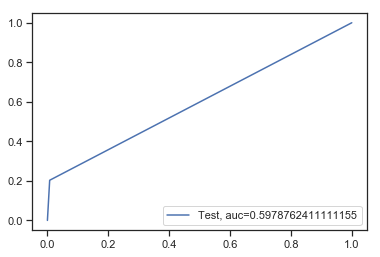

In [292]:
preds_SVM_lin = svm_linear.predict(X_test)
#preds_SVM_lin_probs = svm_linear.predict_proba(X_test)[:,1]

print(classification_report(y_test, preds_SVM_lin))
accuracy = metrics.accuracy_score(y_test, preds_SVM_lin)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_SVM_lin)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

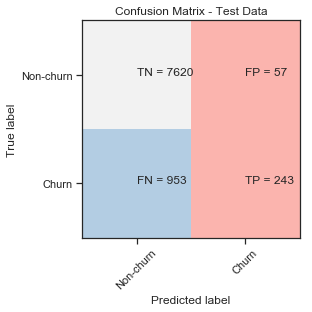

In [294]:
cm = confusion_matrix(y_test, preds_SVM_lin)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show()

## Decision Trees

In [295]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,train_size=0.7,random_state=1)
    

### Feature reduction using LASSO

In [297]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
lsvc=LinearSVC(C=0.001,penalty="l1",dual=False).fit(X_train,y_train)
model=SelectFromModel(lsvc,prefit=True)
X_lasso=model.transform(X_train)
pos=model.get_support(indices=True)
X_lasso.shape
pos

array([  0,   4,   5,   6,   7,   8,  10,  13,  16,  20,  21,  22,  24,
        26,  28,  29,  30,  31,  36,  37,  38,  39,  40,  41,  42,  43,
        44,  45,  46,  47,  48,  54,  55,  56,  61,  62,  66,  67,  68,
        74,  76,  78,  80,  84,  85,  90,  92,  97, 101, 103, 107, 109,
       111, 115, 122, 124, 127, 129, 131, 133, 135, 150, 151, 155, 158,
       162, 164, 166, 167, 169, 171, 172, 173, 175, 177, 179, 180, 185,
       188, 189, 190, 192, 196, 200, 201, 202, 203, 204, 206, 208, 209,
       210, 211, 212, 213, 216], dtype=int64)

In [298]:
#featurevector for decision tree
lasso_features=list(telecom.columns[pos])
print("features for lasso model building",lasso_features)

features for lasso model building ['mobile_number', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'arpu_7', 'onnet_mou_6', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_9', 'roam_og_mou_7', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_mou_7', 'std_og_mou_8', 'std_og_mou_9', 'spl_og_mou_7', 'spl_og_mou_9', 'og_others_7', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_9', 'loc_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_

decision tree with default hyperparameter

In [299]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [300]:
#max_depth which is 5 so that we can plot and read the tree
dt1=DecisionTreeClassifier(max_depth=5)
dt1.fit(X_lasso,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [301]:
#evaluation metrices of our default model
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
#making predictions
X_test=pd.DataFrame(data=X_test).iloc[:,pos]
y_pred1=dt1.predict(X_test)
#classification report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7677
           1       0.73      0.49      0.59      1196

   micro avg       0.91      0.91      0.91      8873
   macro avg       0.83      0.73      0.77      8873
weighted avg       0.90      0.91      0.90      8873



In [302]:
#confusionn matrix
print(confusion_matrix(y_test,y_pred1))

#accuracy
print("accuracy of decision tree:",accuracy_score(y_test,y_pred1))

[[7465  212]
 [ 610  586]]
accuracy of decision tree: 0.9073594049363237


### Hyperparameter Tunning

In [303]:
#gridsearchcv to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#specify number of folds for kfoldcv
n_folds=5
#parameter to built model
parameters={'max_depth':range(1,40)}
#instantiate the model
dt=DecisionTreeClassifier(criterion="gini",random_state=100)

#fit tree on training data
tree=GridSearchCV(dt,parameters,
                  cv = n_folds,scoring="accuracy")
tree.fit(X_lasso,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(1, 40)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [304]:
#score of gridsearch

score=tree.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.22,0.01,0.00,0.00,1,{'max_depth': 1},0.89,0.88,0.89,0.89,0.88,0.89,0.00,11,0.89,0.88,0.89,0.88,0.88,0.89,0.01
1,0.38,0.01,0.00,0.00,2,{'max_depth': 2},0.90,0.91,0.90,0.91,0.90,0.91,0.00,3,0.91,0.91,0.91,0.91,0.91,0.91,0.00
2,0.54,0.01,0.00,0.00,3,{'max_depth': 3},0.90,0.91,0.91,0.91,0.90,0.91,0.00,1,0.91,0.91,0.91,0.91,0.91,0.91,0.00
3,0.69,0.00,0.00,0.00,4,{'max_depth': 4},0.90,0.91,0.91,0.91,0.90,0.91,0.00,2,0.91,0.91,0.91,0.91,0.91,0.91,0.00
4,0.85,0.00,0.00,0.00,5,{'max_depth': 5},0.90,0.90,0.91,0.91,0.90,0.90,0.00,5,0.91,0.91,0.91,0.91,0.91,0.91,0.00


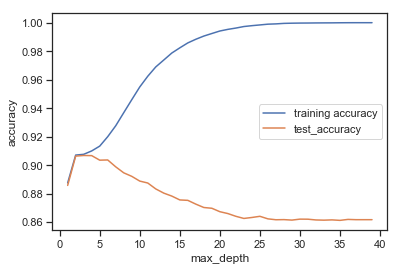

In [305]:
#plotting accuracy with max_depth
plt.figure()
plt.plot(score["param_max_depth"],score["mean_train_score"],label="training accuracy")
plt.plot(score["param_max_depth"],score["mean_test_score"],label="test_accuracy")
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.legend()
plt.show()

 Tunning min_sample_leaf 

In [306]:
#gridsearchcv to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#specify number of folds for kfoldcv
n_folds=5
#parameter to built model
parameters={'min_samples_leaf':range(5,200,20)}
#instantiate the model
dt=DecisionTreeClassifier(criterion="gini",random_state=100)

#fit tree on training data
tree=GridSearchCV(dt,parameters,
                  cv = n_folds,scoring="accuracy")
tree.fit(X_lasso,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [307]:
#score of gridsearch

score=tree.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.81,0.14,0.00,0.00,5,{'min_samples_leaf': 5},0.87,0.87,0.88,0.88,0.87,0.87,0.01,10,0.96,0.96,0.96,0.96,0.96,0.96,0.00
1,2.15,0.08,0.00,0.00,25,{'min_samples_leaf': 25},0.89,0.89,0.91,0.91,0.90,0.90,0.01,9,0.92,0.93,0.92,0.92,0.92,0.92,0.00
2,1.97,0.11,0.00,0.00,45,{'min_samples_leaf': 45},0.90,0.90,0.91,0.91,0.90,0.90,0.00,8,0.92,0.92,0.92,0.92,0.92,0.92,0.00
3,1.78,0.07,0.00,0.00,65,{'min_samples_leaf': 65},0.90,0.90,0.91,0.91,0.90,0.91,0.00,7,0.91,0.91,0.91,0.91,0.92,0.91,0.00
4,1.73,0.08,0.00,0.00,85,{'min_samples_leaf': 85},0.90,0.90,0.91,0.91,0.91,0.91,0.00,6,0.91,0.91,0.91,0.91,0.91,0.91,0.00


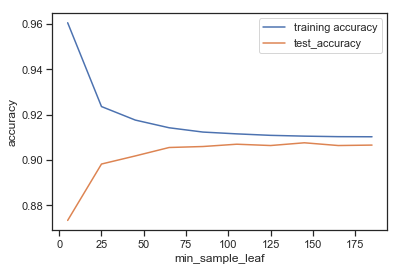

In [308]:
#plotting accuracy with min_samples_leaf
plt.figure()
plt.plot(score["param_min_samples_leaf"],score["mean_train_score"],label="training accuracy")
plt.plot(score["param_min_samples_leaf"],score["mean_test_score"],label="test_accuracy")
plt.xlabel("min_sample_leaf")
plt.ylabel("accuracy")
plt.legend()
plt.show()

tunning min_sample_split

In [309]:
#gridsearchcv to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#specify number of folds for kfoldcv
n_folds=5
#parameter to built model
parameters={'min_samples_split':range(5,200,20)}
#instantiate the model
dt=DecisionTreeClassifier(criterion="gini",random_state=100)

#fit tree on training data
tree=GridSearchCV(dt,parameters,
                  cv = n_folds,scoring="accuracy")
tree.fit(X_lasso,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [310]:
#score of gridsearch

score=tree.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.11,0.17,0.00,0.00,5,{'min_samples_split': 5},0.87,0.86,0.87,0.87,0.86,0.86,0.00,10,0.99,0.99,0.99,0.99,0.99,0.99,0.00
1,3.07,0.15,0.00,0.00,25,{'min_samples_split': 25},0.87,0.88,0.87,0.88,0.87,0.88,0.00,9,0.96,0.96,0.96,0.95,0.96,0.96,0.00
2,3.05,0.15,0.00,0.00,45,{'min_samples_split': 45},0.88,0.88,0.88,0.89,0.88,0.88,0.00,8,0.94,0.94,0.95,0.94,0.94,0.94,0.00
3,3.02,0.16,0.00,0.00,65,{'min_samples_split': 65},0.89,0.88,0.89,0.89,0.88,0.89,0.00,7,0.94,0.94,0.94,0.93,0.94,0.94,0.00
4,3.03,0.19,0.00,0.00,85,{'min_samples_split': 85},0.89,0.89,0.89,0.89,0.89,0.89,0.00,6,0.93,0.93,0.93,0.93,0.93,0.93,0.00


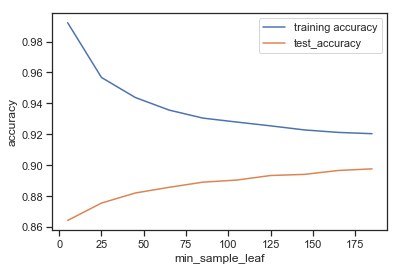

In [311]:
#plotting accuracy with max_depth
plt.figure()
plt.plot(score["param_min_samples_split"],score["mean_train_score"],label="training accuracy")
plt.plot(score["param_min_samples_split"],score["mean_test_score"],label="test_accuracy")
plt.xlabel("min_sample_leaf")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [312]:
# create the parameter grid
param_grid={'max_depth':range(5,15,5),'min_samples_leaf':range(25,175,50),'min_samples_split':range(50,150,50),'criterion':["entropy","gini"]}
n_folds=5
#instiate the grid search model
dtree=DecisionTreeClassifier()
grid_search=GridSearchCV(estimator=dtree,param_grid=param_grid,cv=n_folds,verbose=1)
#fit the grid search to the data
grid_search.fit(X_lasso,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  2.8min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(5, 15, 5), 'min_samples_leaf': range(25, 175, 50), 'min_samples_split': range(50, 150, 50), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [314]:
#cv results
cv_results=pd.DataFrame(grid_search.cv_results_)
#accuracy
print("best accuracy",grid_search.best_score_)

best accuracy 0.9072991642915801


In [315]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=75, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [316]:
#model with optimal hyperparameter
clf_gini=DecisionTreeClassifier(criterion="gini",random_state=100,max_depth=5,min_samples_leaf=25,min_samples_split=50)
clf_gini.fit(X_lasso,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=25, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [317]:
#accuracy score
print("accuracy score of decision tree final model:",clf_gini.score(X_test,y_test))

accuracy score of decision tree final model: 0.9074721063901724


summary - Decision Tree
.getting around accuracy 90%
.31 features selected foe model building

## Random Forest

random forest with default hypereparameter

In [318]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
model_rfe=RandomForestClassifier()
model_rfe.fit(X_lasso,y_train)
#make prediction
prediction_test=model_rfe.predict(X_test)
print('random forest accuracy with default hyperparameter',metrics.accuracy_score(y_test,prediction_test))

random forest accuracy with default hyperparameter 0.9054434802208948


In [319]:
print(classification_report(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7677
           1       0.74      0.46      0.57      1196

   micro avg       0.91      0.91      0.91      8873
   macro avg       0.83      0.72      0.76      8873
weighted avg       0.90      0.91      0.90      8873



In [320]:
#confusion matrix
print(confusion_matrix(y_test,prediction_test))

[[7479  198]
 [ 641  555]]


#### Hyperparameter tunning

Tunning max_depth

In [321]:
#gridsearchcv to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#specify number of folds for kfoldcv
n_folds=5
#parameter to built model
parameters={'max_depth':range(2,20,5)}
#instantiate the model
rf=RandomForestClassifier()
#fit tree on training data
rf=GridSearchCV(rf,parameters,cv=n_folds,scoring="accuracy")
rf.fit(X_lasso,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [322]:
#score of gridsearch

score=rf.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.30,0.02,0.01,0.00,2,{'max_depth': 2},0.89,0.89,0.90,0.90,0.90,0.89,0.01,4,0.89,0.89,0.90,0.90,0.90,0.90,0.00
1,0.75,0.01,0.01,0.00,7,{'max_depth': 7},0.91,0.91,0.91,0.91,0.91,0.91,0.00,1,0.93,0.92,0.92,0.92,0.92,0.92,0.00
2,1.17,0.01,0.01,0.00,12,{'max_depth': 12},0.91,0.91,0.91,0.91,0.90,0.91,0.00,2,0.96,0.96,0.96,0.96,0.96,0.96,0.00
3,1.45,0.02,0.01,0.00,17,{'max_depth': 17},0.90,0.91,0.91,0.91,0.90,0.90,0.00,3,0.98,0.98,0.98,0.98,0.98,0.98,0.00


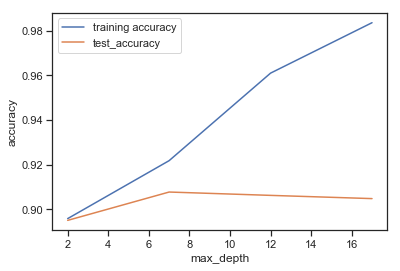

In [323]:
#plotting accuracy with max_depth
plt.figure()
plt.plot(score["param_max_depth"],score["mean_train_score"],label="training accuracy")
plt.plot(score["param_max_depth"],score["mean_test_score"],label="test_accuracy")
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.legend()
plt.show()

Tunning min_sample_leaf 

In [324]:
#gridsearchcv to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#specify number of folds for kfoldcv
n_folds=5
#parameter to built model
parameters={'min_samples_leaf':range(50,400,10)}
#instantiate the model
rf=RandomForestClassifier()

#fit tree on training data
rf=GridSearchCV(rf,parameters,cv=n_folds,scoring="accuracy")
rf.fit(X_lasso,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': range(50, 400, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [325]:
#score of gridsearch

score=rf.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.08,0.03,0.01,0.00,50,{'min_samples_leaf': 50},0.91,0.91,0.91,0.91,0.90,0.91,0.00,5,0.91,0.91,0.91,0.91,0.91,0.91,0.00
1,0.99,0.04,0.01,0.00,60,{'min_samples_leaf': 60},0.91,0.91,0.91,0.91,0.91,0.91,0.00,1,0.91,0.91,0.91,0.91,0.91,0.91,0.00
2,0.98,0.02,0.01,0.00,70,{'min_samples_leaf': 70},0.91,0.91,0.91,0.91,0.91,0.91,0.00,6,0.91,0.91,0.91,0.91,0.91,0.91,0.00
3,0.97,0.01,0.01,0.00,80,{'min_samples_leaf': 80},0.91,0.91,0.91,0.91,0.91,0.91,0.00,6,0.91,0.91,0.91,0.91,0.91,0.91,0.00
4,0.96,0.01,0.01,0.00,90,{'min_samples_leaf': 90},0.91,0.90,0.91,0.91,0.91,0.91,0.00,4,0.91,0.91,0.91,0.91,0.91,0.91,0.00


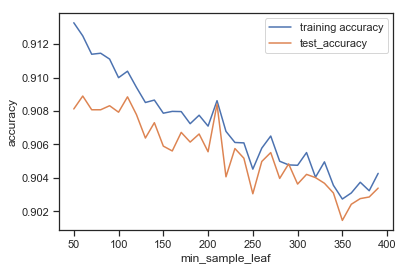

In [326]:
#plotting accuracy with max_depth
plt.figure()
plt.plot(score["param_min_samples_leaf"],score["mean_train_score"],label="training accuracy")
plt.plot(score["param_min_samples_leaf"],score["mean_test_score"],label="test_accuracy")
plt.xlabel("min_sample_leaf")
plt.ylabel("accuracy")
plt.legend()
plt.show()

tunning min_sample_split

In [327]:
#gridsearchcv to find optimal min_sample_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#specify number of folds for kfoldcv
n_folds=5
#parameter to built model
parameters={'min_samples_split':range(100,500,25)}
#instantiate the model
rf=RandomForestClassifier()

#fit tree on training data
rf=GridSearchCV(rf,parameters,cv=n_folds,scoring="accuracy")
rf.fit(X_lasso,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(100, 500, 25)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [328]:
#score of gridsearch

score=rf.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.53,0.05,0.01,0.00,100,{'min_samples_split': 100},0.91,0.91,0.91,0.91,0.91,0.91,0.00,1,0.92,0.92,0.92,0.92,0.92,0.92,0.00
1,1.46,0.03,0.01,0.00,125,{'min_samples_split': 125},0.91,0.91,0.91,0.91,0.91,0.91,0.00,5,0.92,0.92,0.92,0.92,0.92,0.92,0.00
2,1.45,0.06,0.01,0.00,150,{'min_samples_split': 150},0.91,0.91,0.91,0.91,0.91,0.91,0.00,2,0.92,0.92,0.91,0.91,0.92,0.92,0.00
3,1.39,0.04,0.01,0.00,175,{'min_samples_split': 175},0.91,0.91,0.91,0.91,0.91,0.91,0.00,6,0.91,0.92,0.91,0.92,0.91,0.91,0.00
4,1.41,0.08,0.01,0.00,200,{'min_samples_split': 200},0.91,0.90,0.91,0.91,0.91,0.91,0.00,12,0.91,0.91,0.91,0.91,0.91,0.91,0.00


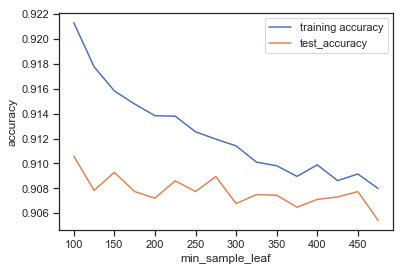

In [329]:
#plotting accuracy with min_sample _split
plt.figure()
plt.plot(score["param_min_samples_split"],score["mean_train_score"],label="training accuracy")
plt.plot(score["param_min_samples_split"],score["mean_test_score"],label="test_accuracy")
plt.xlabel("min_sample_leaf")
plt.ylabel("accuracy")
plt.legend()
plt.show()

grid search to findoptimal hyperparameter

In [330]:
# create the parameter grid
param_grid={'max_depth':range(4,8,10),
            'min_sample_leaf':range(100,300,100),'min_sample_split':range(200,500,100),
            'n_estimator':[500,700],'max_feature':[10,20,25]}
#create based model
rf=RandomForestClassifier()
#instiate the grid search model
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=3,n_jobs=-1,verbose=1)


In [331]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)
model_rf=RandomForestClassifier(bootstrap=True,max_depth=10,
                                                    min_samples_leaf=100,
                                                    min_samples_split=200,
                                                    n_estimators=1000,
                                                    oob_score=True,n_jobs=-1,
                                                    random_state=50,
                                                    max_features=15,max_leaf_nodes=30)
model_rf.fit(X_train,y_train)

#make predictions
prediction_test=model_rf.predict(X_test)

In [332]:
#evaluation matrics
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,prediction_test))
print(confusion_matrix(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      5157
           1       0.78      0.46      0.58       758

   micro avg       0.91      0.91      0.91      5915
   macro avg       0.85      0.72      0.77      5915
weighted avg       0.91      0.91      0.90      5915

[[5060   97]
 [ 408  350]]


In [333]:
#accuracy score
print("Accuracy score of random forest:",metrics.accuracy_score(y_test,prediction_test))

Accuracy score of random forest: 0.9146238377007607


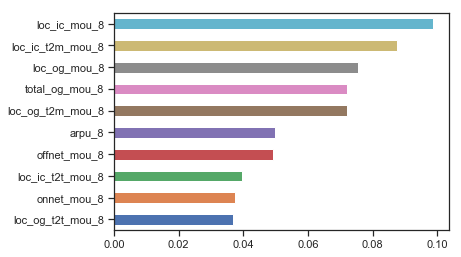

In [357]:
X=X_test
#scalling the scale
features=X.columns.values
X=pd.DataFrame(scaler.transform(X))
X.columns=features
importances=model_rf.feature_importances_
weights=pd.Series(importances,index=X.columns.values)
weights.sort_values()[-10:].plot(kind='barh')


observation:
    from random forest algorithm,local incoming for month 8,then local incoming oprator to other oprator  for 8 month and local outgoing for 8 month are the most important predictor variables to predict churn

### Bussiness aspect

From the above we can clearly infer that calls related incoming & outgoing within a circle is key for identifying churn customers.
Especially the usage during the action pahse when compared to good month (8th month) has reduced
the other key factor and also if the recharge amount shows a dip in the action phase is sign of churn.
Age on network is also a key indicator for identifying the churn, if ARP is less than 500 days and their usage is reduce then the customer is going to be churned.
The usage of mobile data has also reduced when compared with 8th month. So, data usage & amount can also be the other features for understanding the churn behavior.